In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import nltk

In [2]:
# Download NLTK stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Load the raw data
raw_mail_data = pd.read_csv('/content/mail_data.csv')
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [5]:
# Convert labels to numeric values
mail_data['Category'] = mail_data['Category'].apply(lambda x: 0 if x == 'spam' else 1)

In [6]:
# Splitting data into train and test sets
X = mail_data['Message']
Y = mail_data['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [7]:
# Text preprocessing function with stemming
def preprocess_text(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(token) for token in tokens if token not in stopwords.words('english')]
    return ' '.join(tokens)

X_train_preprocessed = X_train.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

In [8]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = tfidf_vectorizer.fit_transform(X_train_preprocessed)
X_test_features = tfidf_vectorizer.transform(X_test_preprocessed)

In [9]:
# Naive Bayes Model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_features, Y_train)

MultinomialNB()

In [10]:
# Model evaluation
Y_pred = naive_bayes_model.predict(X_test_features)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9704035874439462
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[122  33]
 [  0 960]]


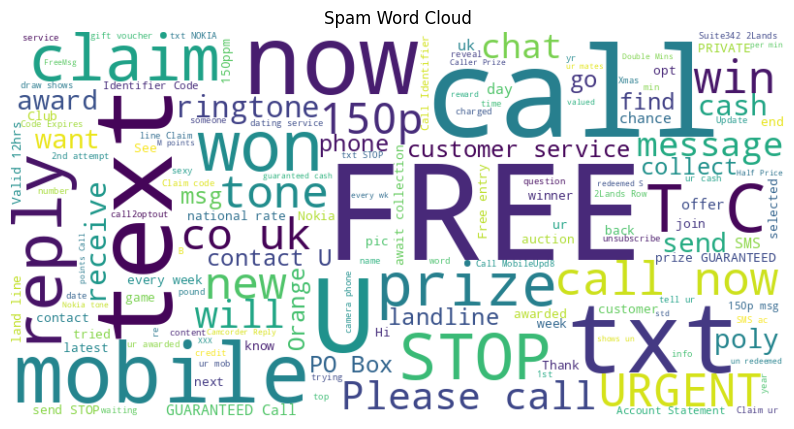

In [11]:
# Word Cloud
spam_words = ' '.join(mail_data[mail_data['Category'] == 0]['Message'])
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')
plt.show()

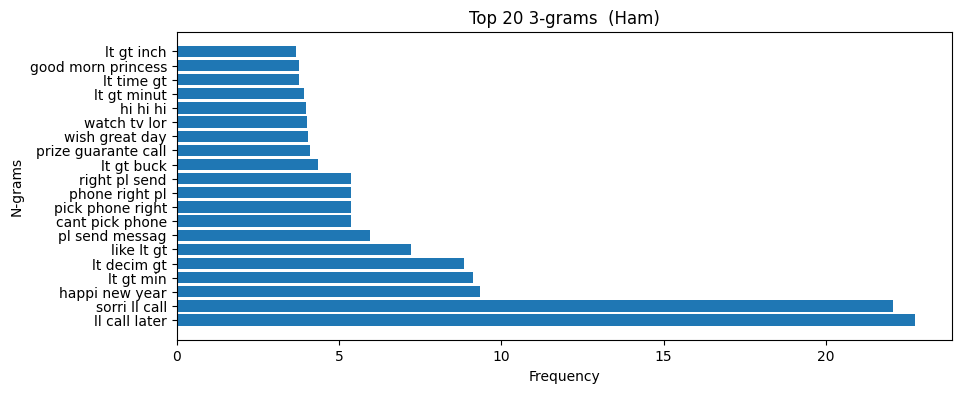

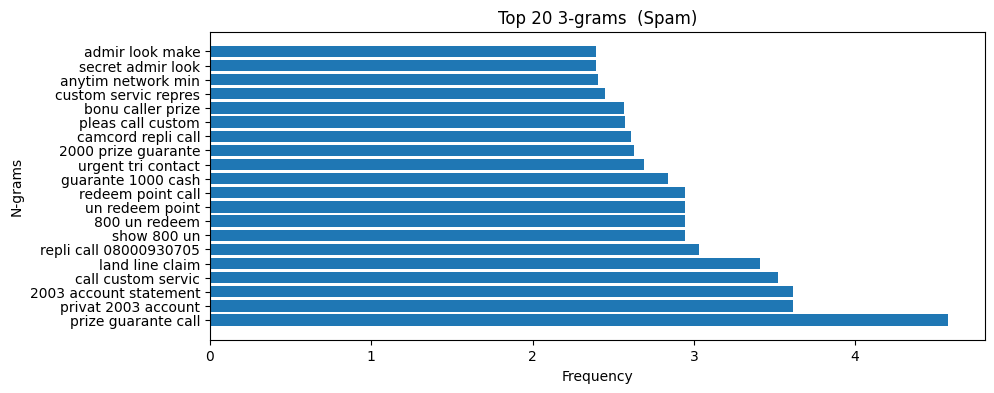

In [20]:
# N-gram Bar Chart for Bigger Phrases
def plot_ngram_bar_chart(text, ngram_range=(1, 1), num_top_ngrams=20, title_suffix='', chart_size=(10, 4)):
    vec = TfidfVectorizer(ngram_range=ngram_range, max_features=5000)
    X = vec.fit_transform(text)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:num_top_ngrams]
    top_words, freq = zip(*top_words)

    plt.figure(figsize=chart_size)
    plt.barh(top_words, freq)
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(f'Top {num_top_ngrams} {ngram_range[0]}-grams {title_suffix}')
    plt.show()

# Specify a larger n-gram range, e.g., (3, 3) for trigrams
plot_ngram_bar_chart(X_train_preprocessed, ngram_range=(3, 3), num_top_ngrams=20, title_suffix=' (Ham)', chart_size=(10, 4))

# For spam data
spam_text = mail_data[mail_data['Category'] == 0]['Message']
X_spam_preprocessed = spam_text.apply(preprocess_text)
plot_ngram_bar_chart(X_spam_preprocessed, ngram_range=(3, 3), num_top_ngrams=20, title_suffix=' (Spam)', chart_size=(10, 4))
